In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ml-course-main/data/multiclass_classification/train_data.csv', nrows=500)
df.head()

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,NaN,NaN,0.025449,NaN,NaN,0.368421,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,q,NaN,NaN,NaN
1,11382,a,NaN,NaN,0.031297,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,NaN,NaN,NaN,NaN
2,16531,a,NaN,NaN,0.024475,NaN,NaN,0.342105,NaN,NaN,...,NaN,NaN,a,NaN,a,NaN,b,NaN,NaN,NaN
3,1896,a,NaN,NaN,0.041694,NaN,NaN,0.447368,NaN,NaN,...,NaN,NaN,NaN,NaN,a,NaN,NaN,NaN,NaN,NaN
4,18262,c,NaN,NaN,0.038120,NaN,NaN,0.315789,NaN,NaN,...,NaN,NaN,b,NaN,a,NaN,a,NaN,NaN,NaN


In [3]:
for column in list(df.loc[:,'c_0327':].columns):
    for row_number in range(0,df.shape[0]):
        if (df[column].loc[row_number] == ""):
            pass
        else:
            if isinstance(df[column].loc[row_number], float):
                pass
            else:
                df[column].loc[row_number] = ord(df[column].loc[row_number])

In [4]:
df.loc[:,'c_0327':] = df.loc[:,'c_0327':].astype(float)

In [5]:
df = df.fillna(0.0)

In [6]:
df.head(2)

,id,release,n_0000,n_0001,n_0002,n_0003,n_0004,n_0005,n_0006,n_0007,...,c_1368,c_1369,c_1370,c_1371,c_1372,c_1373,c_1374,c_1375,c_1376,c_1377
0,11193,a,0.0,0.0,0.025449,0.0,0.0,0.368421,0.0,0.0,...,0.0,0.0,0.0,0.0,97.0,0.0,113.0,0.0,0.0,0.0
1,11382,a,0.0,0.0,0.031297,0.0,0.0,0.315789,0.0,0.0,...,0.0,0.0,97.0,0.0,97.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.release.value_counts()

a    258
b    148
c     94
Name: release, dtype: int64

In [8]:
df['output'] = 0

In [9]:
df.loc[df['release'] == 'b', 'output'] = 1
df.loc[df['release'] == 'c', 'output'] = 2

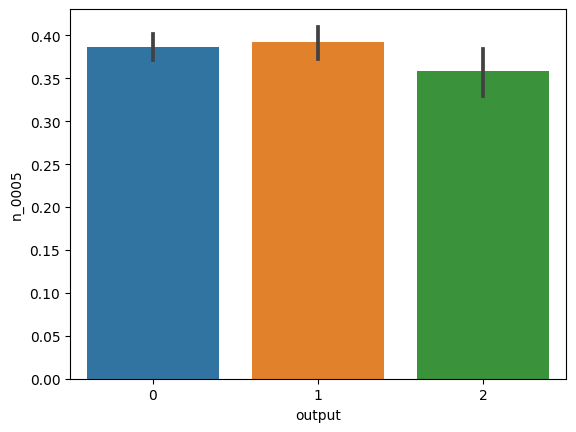

In [10]:
sns.barplot(x = "output", y = "n_0005", data = df); # у класса C наибольший показатель признака n_005

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df["output"]
X = df.drop(columns = ['release','id','output'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score

# ovr_classifier

In [13]:
#logreg

In [14]:
model_to_set = OneVsRestClassifier(LogisticRegression(random_state=11))

parameters = {
    "estimator__C": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__C': 1e-15}


In [15]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsRestClassifier(estimator=LogisticRegression(C=1e-15, random_state=11))
best params: {'estimator__C': 1e-15}


In [16]:
import timeit
model_to_set = OneVsRestClassifier(LogisticRegression(random_state=11, C=1e-15))

starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovr_lr_time = timeit.default_timer() - starttime
print("Learning time:", ovr_lr_time)
predict = model_to_set.predict(X_test_scaled)
predict_proba = model_to_set.predict_proba(X_test_scaled)[:,1]

Learning time: 0.02109842899997716


In [17]:
model_to_set.classes_

array([0, 1, 2])

In [18]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]

In [19]:
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [20]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [21]:
ovr_lr_auc = model_scores.mean()

In [22]:
ovr_lr_r2 = r2_score(y_test,predict)

Train/Test split results:
LogisticRegression accuracy is 0.007
LogisticRegression log_loss is 0.775
LogisticRegression auc is 0.360
Train/Test split results:
LogisticRegression accuracy is 0.813
LogisticRegression log_loss is 0.604
LogisticRegression auc is 1.000
Train/Test split results:
LogisticRegression accuracy is 0.527
LogisticRegression log_loss is 0.530
LogisticRegression auc is 0.044


<Figure size 640x480 with 0 Axes>

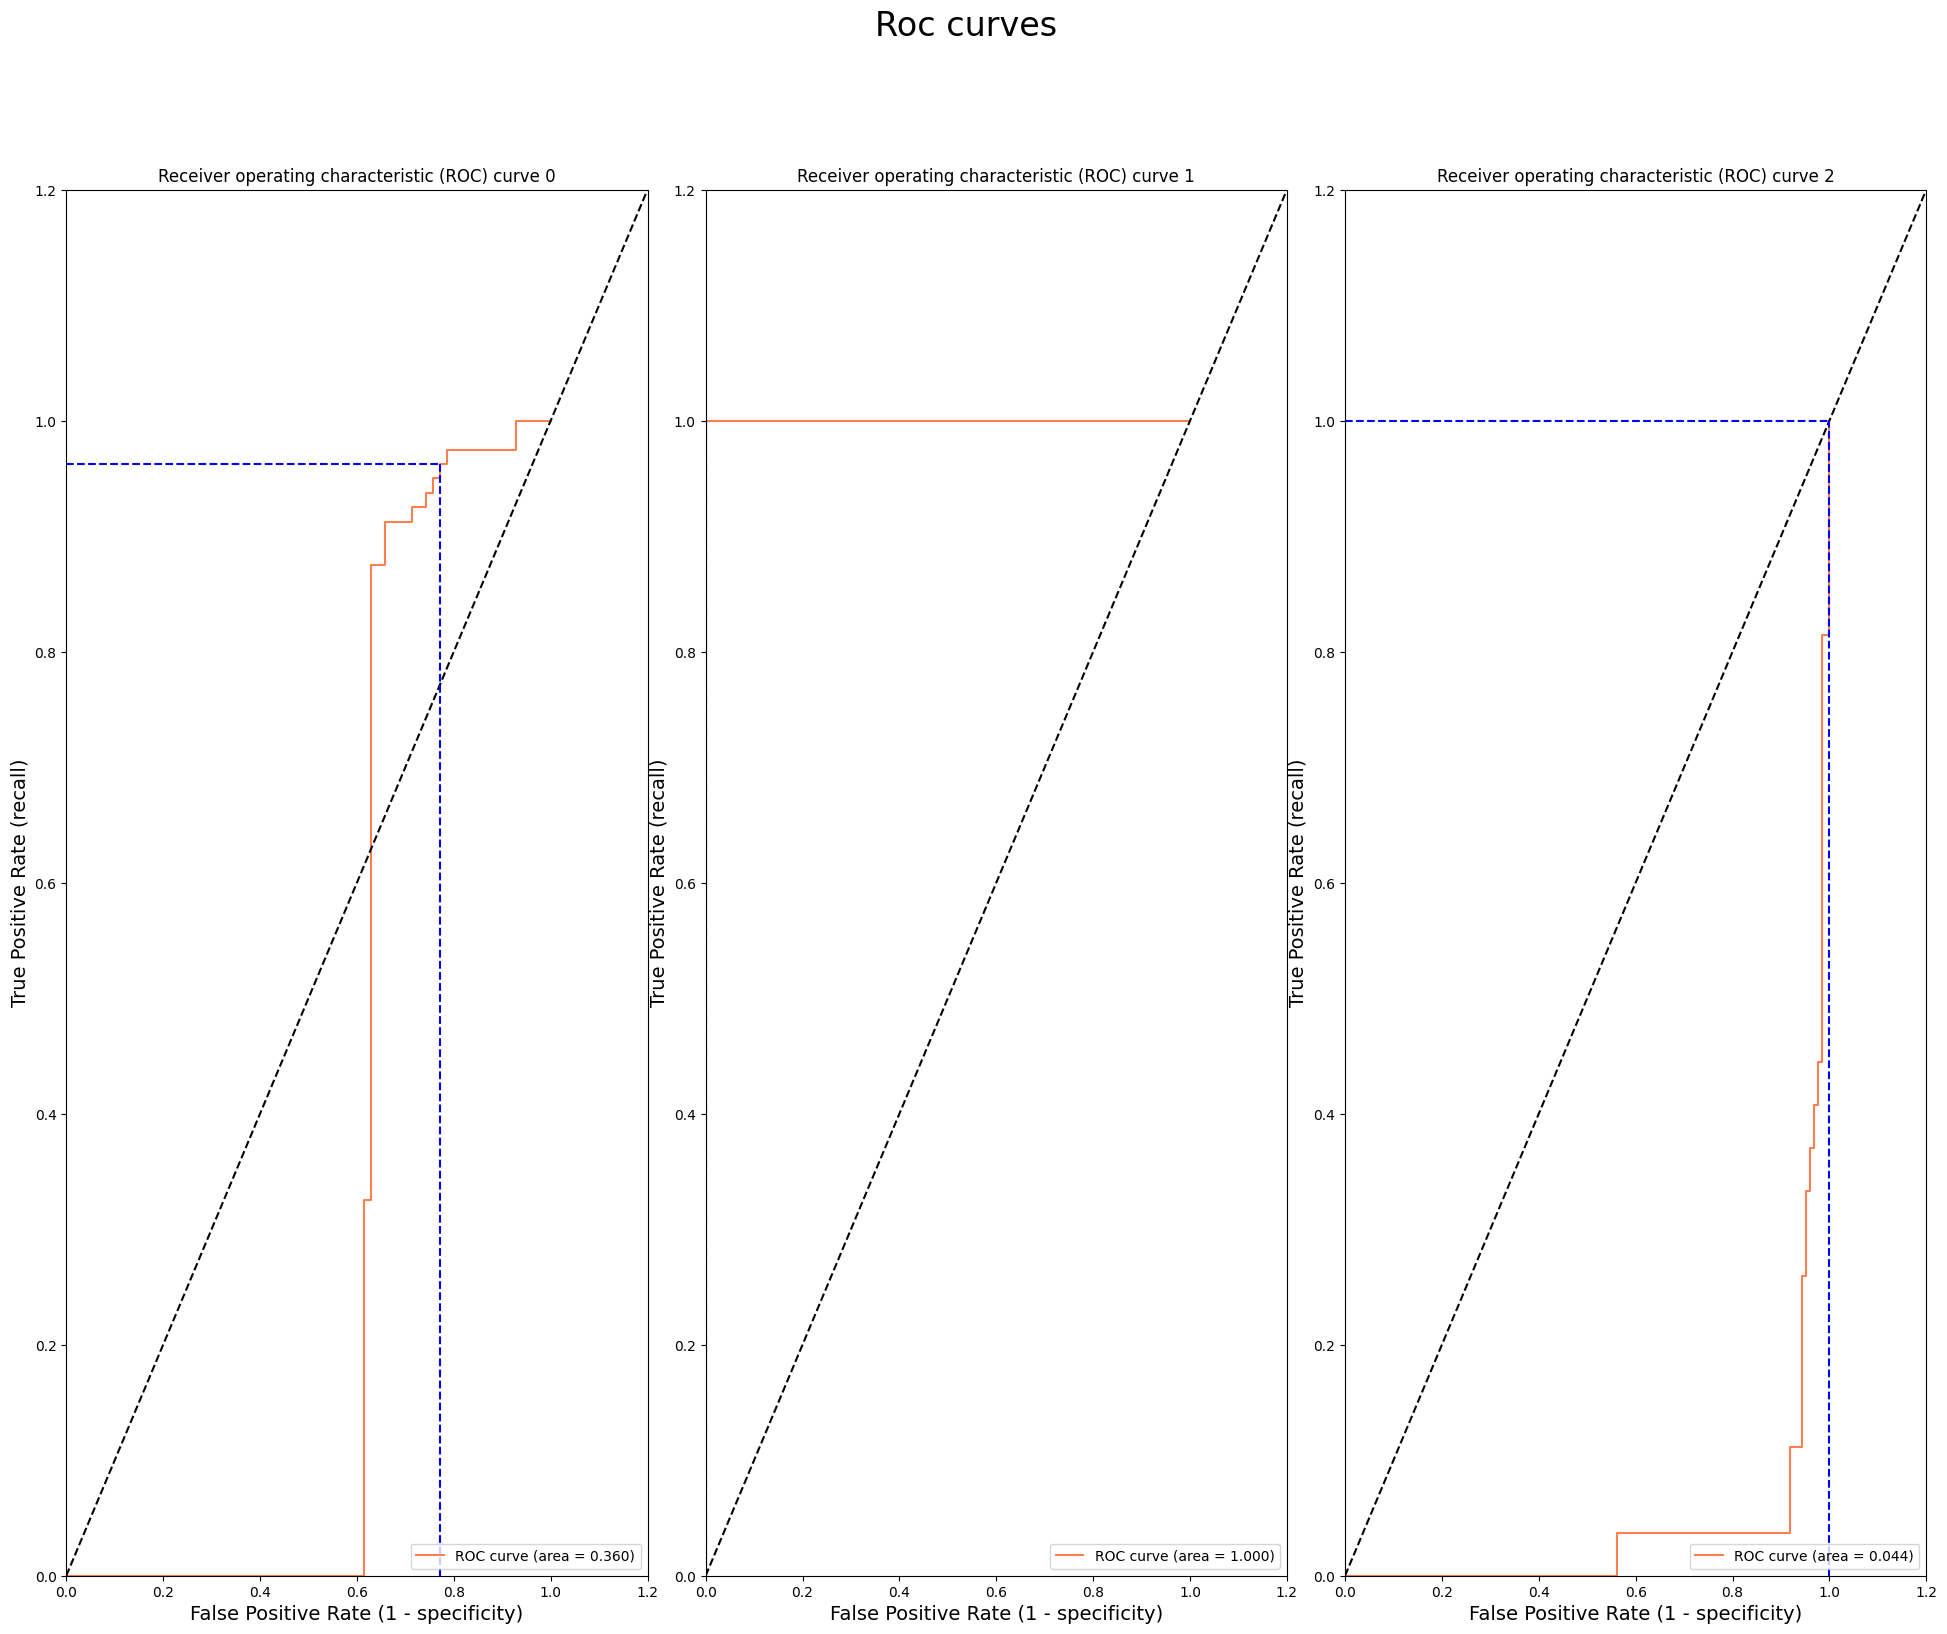

In [23]:
plt.figure()
plt.figure(figsize=(24, 18))
plt.suptitle("Roc curves", fontsize=24)
plt.subplots_adjust(wspace = 0.1, hspace= 0.1)

for i in range(0,len(model_to_set.classes_)):
    [fpr, tpr, thr] = roc_curve(y_tests[i], predict_proba)
    print('Train/Test split results:')
    print(LogisticRegression().__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_tests[i], predict))
    print(LogisticRegression().__class__.__name__+" log_loss is %2.3f" % log_loss(y_tests[i], predict_proba))
    print(LogisticRegression().__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    idx = np.min(np.where(tpr > 0.95))
    plt.subplot(1,3,i+1)
    plt.title(f"Roc curve{i}")
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 2], [0, 2], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.2])
    plt.ylim([0.0, 1.2])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title(f'Receiver operating characteristic (ROC) curve {i}')
    plt.legend(loc="lower right")
plt.show()

In [24]:
#svm
from sklearn.svm import SVC

In [25]:
model_to_set = OneVsRestClassifier(SVC(random_state=11))

parameters = {
    "estimator__C": [0.1, 0.25, 0.5, 0.75, 1, 2],
    "estimator__kernel": ["linear", "rbf"],
    "estimator__gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [26]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsRestClassifier(estimator=SVC(C=0.1, kernel='linear', random_state=11))
best params: {'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [27]:
import timeit
model_to_set = OneVsRestClassifier(SVC(random_state=11,C=0.1,gamma='scale',kernel='linear'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovr_svc_time = timeit.default_timer() - starttime
print("Learning time:", ovr_svc_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.048402463999991596


In [28]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]

In [29]:
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [30]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [31]:
ovr_svc_auc = model_scores.mean()
ovr_svc_r2 = r2_score(y_test,predict)

In [32]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model_to_set = OneVsRestClassifier(KNeighborsClassifier())
parameters = {
    "estimator__n_neighbors": np.arange(1, 11, 2),
    "estimator__weights": ['uniform', 'distance']
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [34]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=1))
best params: {'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [35]:
import timeit
model_to_set = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1, weights='uniform'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovr_knn_time = timeit.default_timer() - starttime
print("Learning time:", ovr_knn_time)
predict = model_to_set.predict(X_test_scaled)
predict_proba = model_to_set.predict_proba(X_test_scaled)[:,1]

Learning time: 0.014054178999998612


In [36]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [37]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [38]:
ovr_knn_auc = model_scores.mean()
ovr_knn_r2 = r2_score(y_test,predict)

Train/Test split results:
KNeighborsClassifier accuracy is 0.033
KNeighborsClassifier log_loss is 28.092
KNeighborsClassifier auc is 0.199
Train/Test split results:
KNeighborsClassifier accuracy is 0.840
KNeighborsClassifier log_loss is 0.230
KNeighborsClassifier auc is 0.995
Train/Test split results:
KNeighborsClassifier accuracy is 0.527
KNeighborsClassifier log_loss is 16.349
KNeighborsClassifier auc is 0.321


<Figure size 640x480 with 0 Axes>

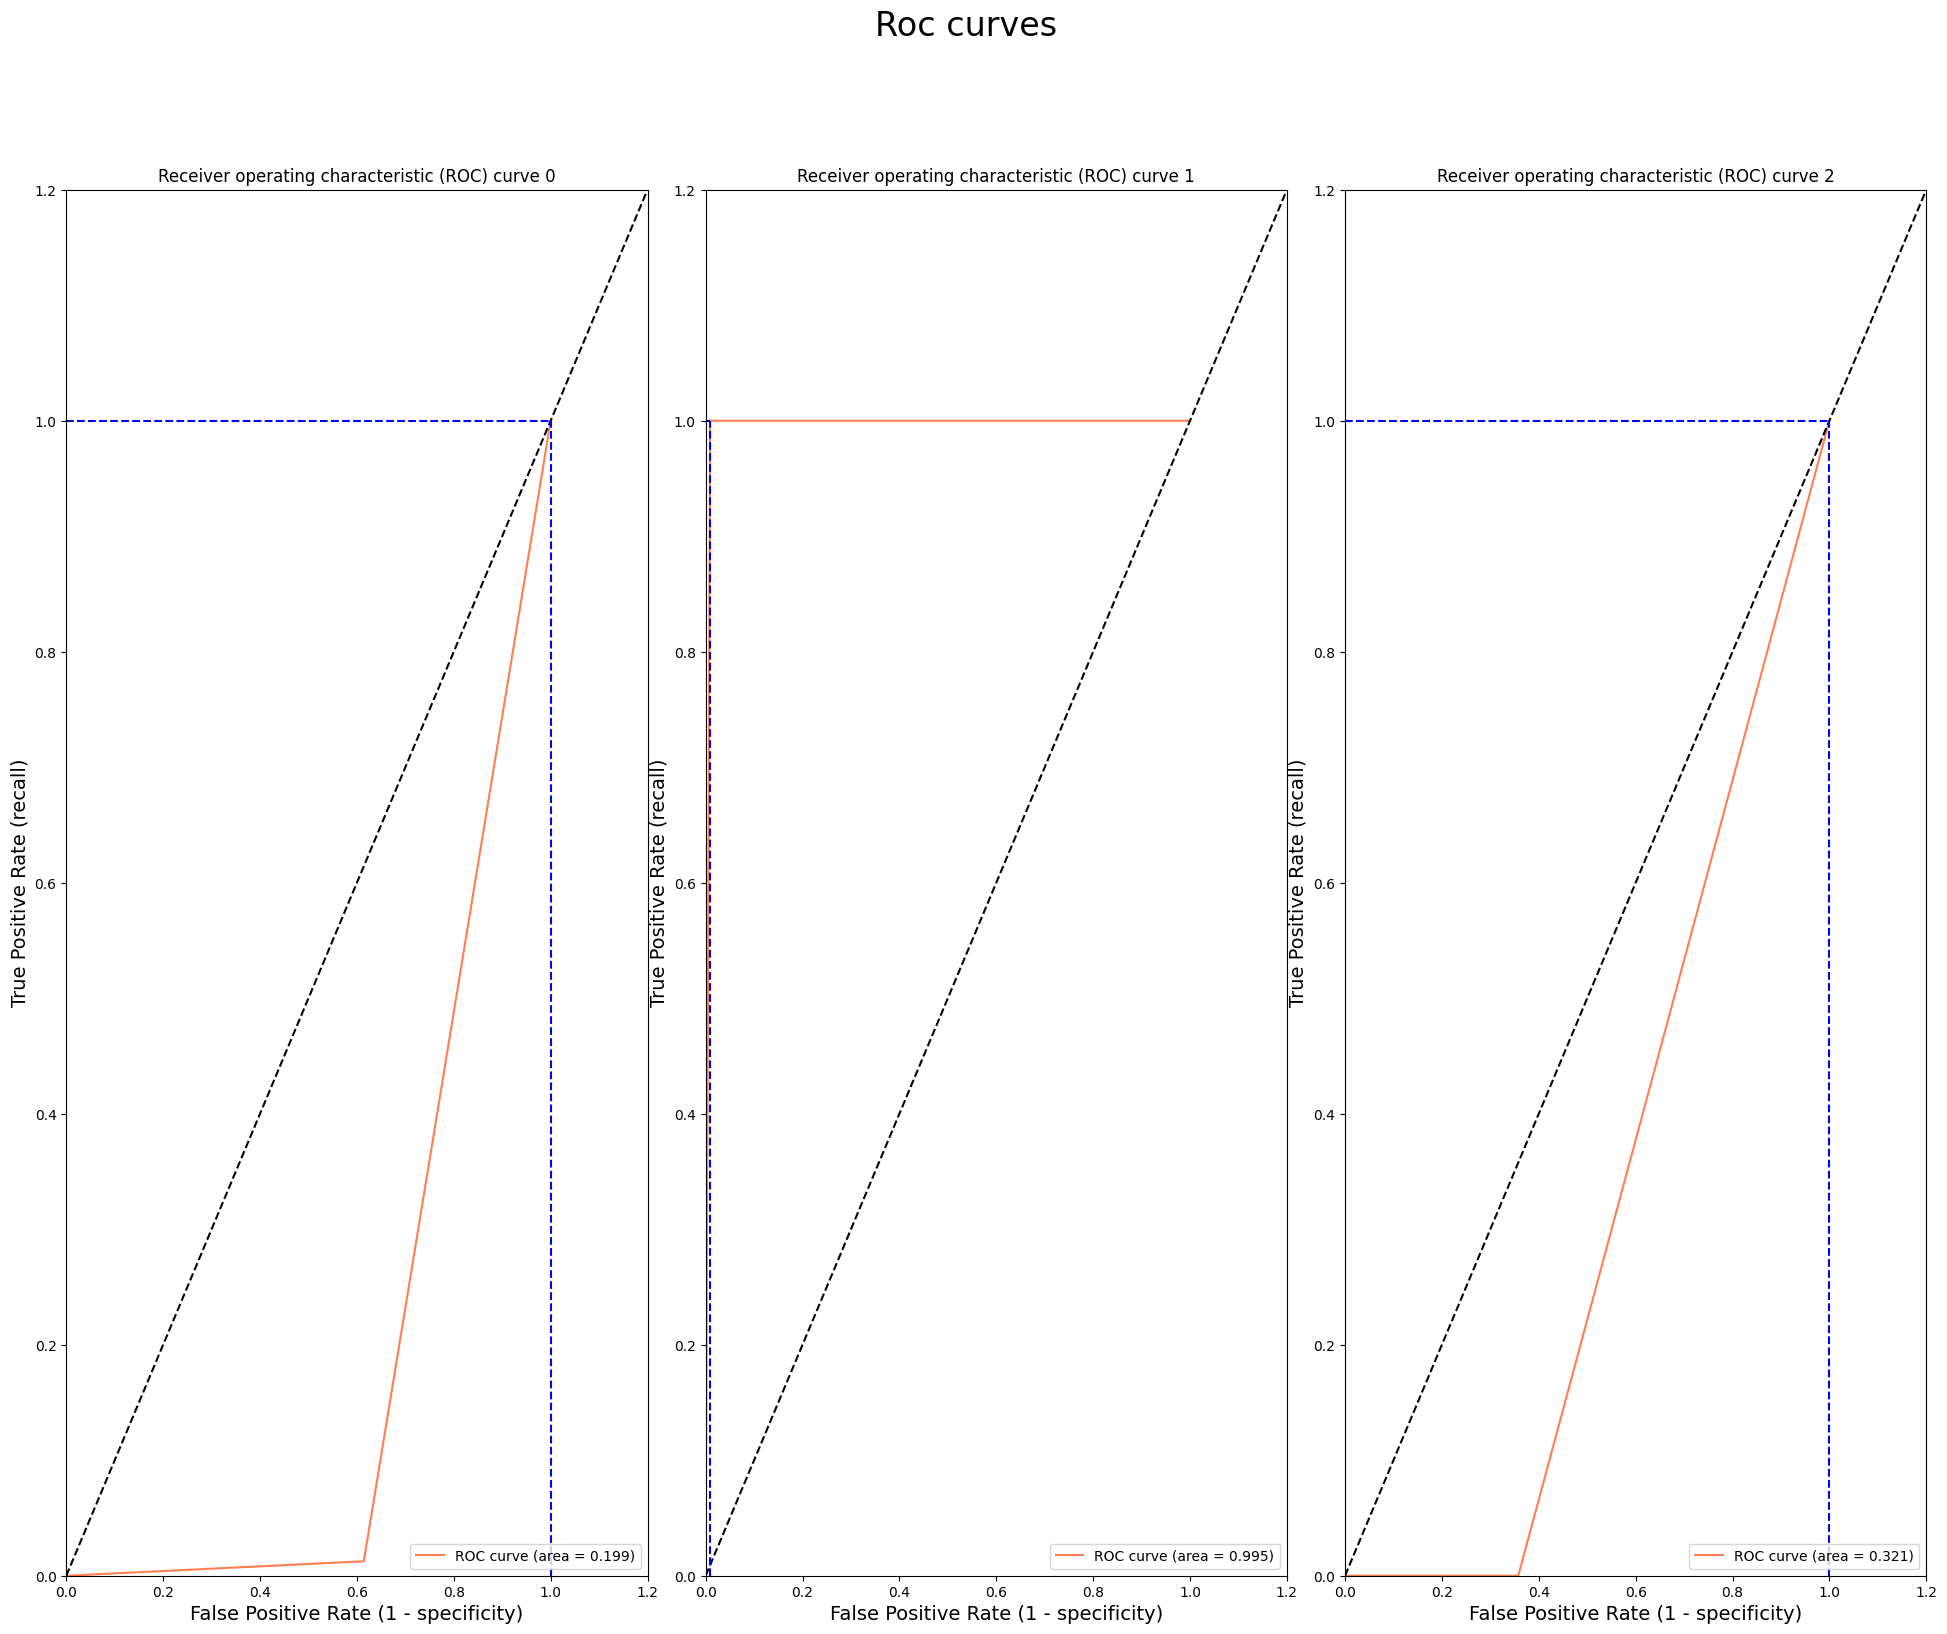

In [39]:
plt.figure()
plt.figure(figsize=(24, 18))
plt.suptitle("Roc curves", fontsize=24)
plt.subplots_adjust(wspace = 0.1, hspace= 0.1)

for i in range(0,len(model_to_set.classes_)):
    [fpr, tpr, thr] = roc_curve(y_tests[i], predict_proba)
    print('Train/Test split results:')
    print(KNeighborsClassifier().__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_tests[i], predict))
    print(KNeighborsClassifier().__class__.__name__+" log_loss is %2.3f" % log_loss(y_tests[i], predict_proba))
    print(KNeighborsClassifier().__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    idx = np.min(np.where(tpr > 0.95))
    plt.subplot(1,3,i+1)
    plt.title(f"Roc curve{i}")
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 2], [0, 2], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.2])
    plt.ylim([0.0, 1.2])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title(f'Receiver operating characteristic (ROC) curve {i}')
    plt.legend(loc="lower right")
plt.show()

In [40]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [41]:
model_to_set = OneVsRestClassifier(GaussianNB())
parameters = {
    "estimator__priors": [None, [0.33, 0.33, 0.33]],
    "estimator__var_smoothing": np.logspace(0, -9, num=100)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [42]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsRestClassifier(estimator=GaussianNB(var_smoothing=1.0))
best params: {'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [43]:
import timeit
model_to_set = OneVsRestClassifier(GaussianNB(var_smoothing=1.0, priors = None))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovr_nb_time = timeit.default_timer() - starttime
print("Learning time:", ovr_nb_time)
predict = model_to_set.predict(X_test_scaled)
predict_proba = model_to_set.predict_proba(X_test_scaled)[:,1]

Learning time: 0.022235449999982393


In [44]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [45]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [46]:
ovr_nb_auc = model_scores.mean()
ovr_nb_r2 = r2_score(y_test,predict)

Train/Test split results:
GaussianNB accuracy is 0.113
GaussianNB log_loss is 20.484
GaussianNB auc is 0.386
Train/Test split results:
GaussianNB accuracy is 0.700
GaussianNB log_loss is 1.025
GaussianNB auc is 0.954
Train/Test split results:
GaussianNB accuracy is 0.433
GaussianNB log_loss is 16.222
GaussianNB auc is 0.064


<Figure size 640x480 with 0 Axes>

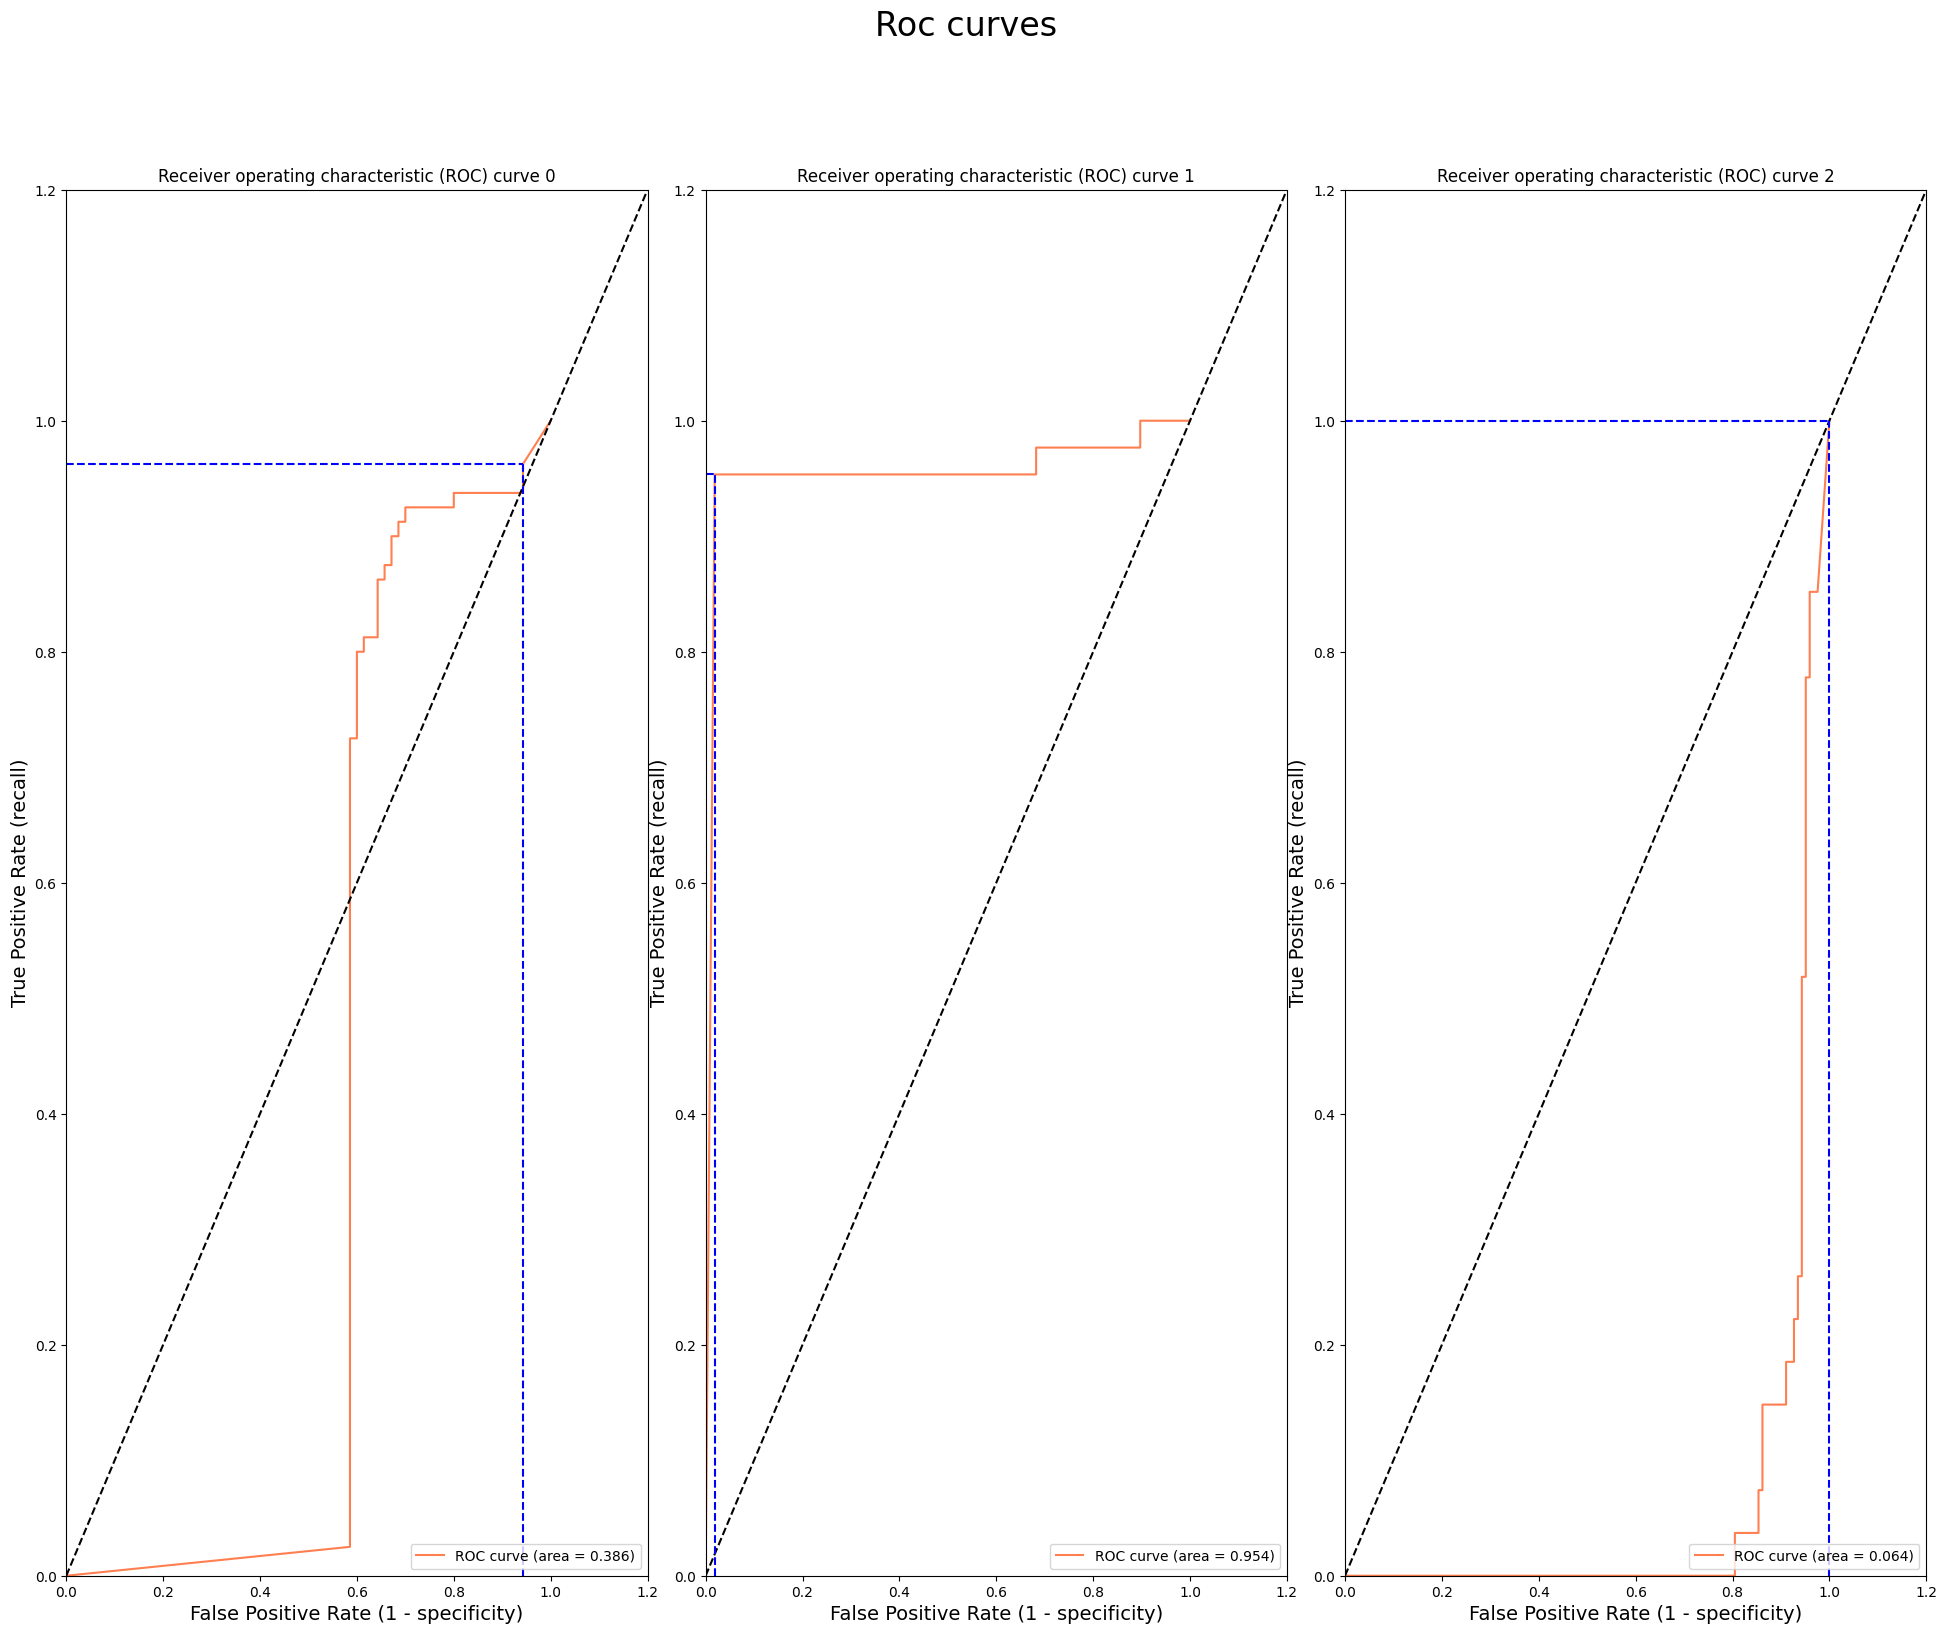

In [47]:
plt.figure()
plt.figure(figsize=(24, 18))
plt.suptitle("Roc curves", fontsize=24)
plt.subplots_adjust(wspace = 0.1, hspace= 0.1)

for i in range(0,len(model_to_set.classes_)):
    [fpr, tpr, thr] = roc_curve(y_tests[i], predict_proba)
    print('Train/Test split results:')
    print(GaussianNB().__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_tests[i], predict))
    print(GaussianNB().__class__.__name__+" log_loss is %2.3f" % log_loss(y_tests[i], predict_proba))
    print(GaussianNB().__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    idx = np.min(np.where(tpr > 0.95))
    plt.subplot(1,3,i+1)
    plt.title(f"Roc curve{i}")
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 2], [0, 2], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.2])
    plt.ylim([0.0, 1.2])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title(f'Receiver operating characteristic (ROC) curve {i}')
    plt.legend(loc="lower right")
plt.show()

In [48]:
#dtc
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_to_set = OneVsRestClassifier(DecisionTreeClassifier(random_state=81))
parameters = {
    "estimator__criterion": ["gini", "entropy", "log_loss"],
    "estimator__splitter": ["best", "random"],
    "estimator__max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "estimator__min_samples_split": [2, 4, 6, 10],
    "estimator__min_samples_leaf": [1, 2, 4, 6, 8, 10, 12],
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [50]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                     random_state=81))
best params: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [51]:
import timeit
model_to_set = OneVsRestClassifier(DecisionTreeClassifier(max_depth=2,random_state=81,
criterion='gini',min_samples_leaf=1,min_samples_split=2,splitter='best'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovr_dtc_time = timeit.default_timer() - starttime
print("Learning time:", ovr_dtc_time)
predict = model_to_set.predict(X_test_scaled)
predict_proba = model_to_set.predict_proba(X_test_scaled)[:,1]

Learning time: 0.02161167999997815


In [52]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [53]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [54]:
ovr_dtc_auc = model_scores.mean()
ovr_dtc_r2 = r2_score(y_test,predict)

Train/Test split results:
DecisionTreeClassifier accuracy is 0.000
DecisionTreeClassifier log_loss is 19.783
DecisionTreeClassifier auc is 0.193
Train/Test split results:
DecisionTreeClassifier accuracy is 0.820
DecisionTreeClassifier log_loss is 0.002
DecisionTreeClassifier auc is 1.000
Train/Test split results:
DecisionTreeClassifier accuracy is 0.533
DecisionTreeClassifier log_loss is 7.580
DecisionTreeClassifier auc is 0.325


<Figure size 640x480 with 0 Axes>

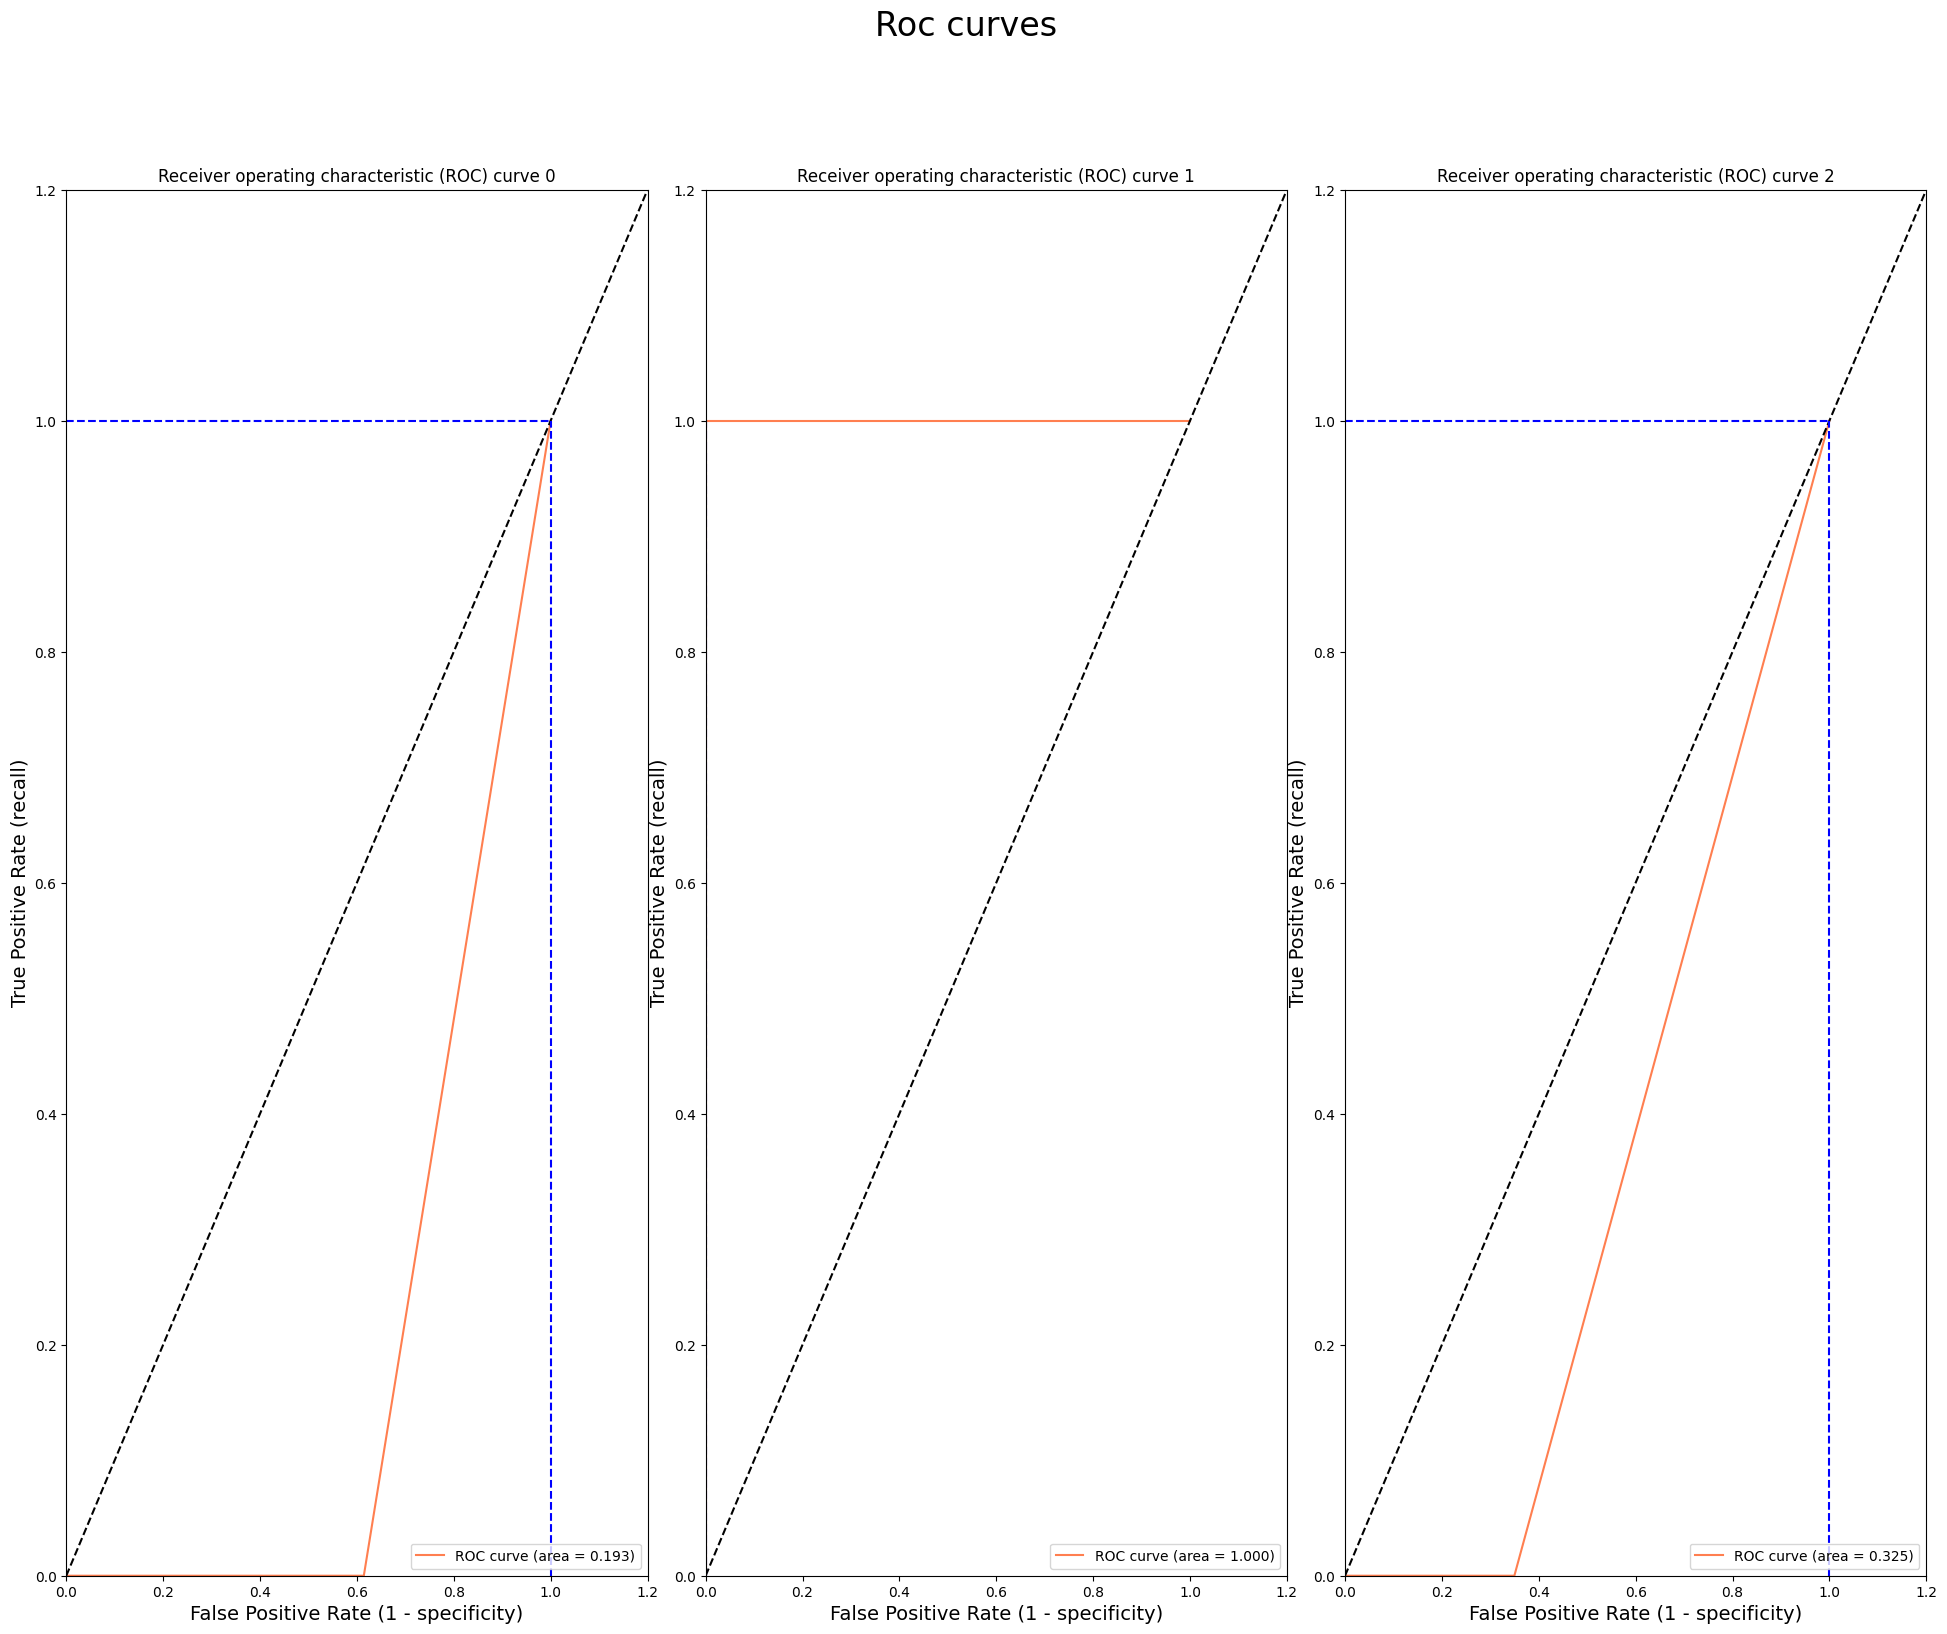

In [55]:
plt.figure()
plt.figure(figsize=(24, 18))
plt.suptitle("Roc curves", fontsize=24)
plt.subplots_adjust(wspace = 0.1, hspace= 0.1)

for i in range(0,len(model_to_set.classes_)):
    [fpr, tpr, thr] = roc_curve(y_tests[i], predict_proba)
    print('Train/Test split results:')
    print(DecisionTreeClassifier().__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_tests[i], predict))
    print(DecisionTreeClassifier().__class__.__name__+" log_loss is %2.3f" % log_loss(y_tests[i], predict_proba))
    print(DecisionTreeClassifier().__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))
    idx = np.min(np.where(tpr > 0.95))
    plt.subplot(1,3,i+1)
    plt.title(f"Roc curve{i}")
    plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
    plt.plot([0, 2], [0, 2], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
    plt.xlim([0.0, 1.2])
    plt.ylim([0.0, 1.2])
    plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
    plt.ylabel('True Positive Rate (recall)', fontsize=14)
    plt.title(f'Receiver operating characteristic (ROC) curve {i}')
    plt.legend(loc="lower right")
plt.show()

# ovo_classifier

In [56]:
#lr

In [57]:
from sklearn.multiclass import OneVsOneClassifier

In [58]:
model_to_set = OneVsOneClassifier(LogisticRegression(random_state=11))

parameters = {
    "estimator__C": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)
model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__C': 1e-15}


In [59]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsOneClassifier(estimator=LogisticRegression(C=1e-15, random_state=11))
best params: {'estimator__C': 1e-15}


In [60]:
import timeit
model_to_set = OneVsOneClassifier(LogisticRegression(random_state=11, C=1e-15))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovo_lr_time = timeit.default_timer() - starttime
print("Learning time:", ovo_lr_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.017437403000030827


In [61]:
model_to_set.classes_

array([0, 1, 2])

In [62]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]

In [63]:
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [64]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [65]:
ovo_lr_auc = model_scores.mean()
ovo_lr_r2 = r2_score(y_test,predict)

In [66]:
#svm
from sklearn.svm import SVC

In [67]:
model_to_set = OneVsOneClassifier(SVC(random_state=11))

parameters = {
    "estimator__C": [0.1, 0.25, 0.5, 0.75, 1, 2],
    "estimator__kernel": ["linear", "rbf"],
    "estimator__gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [68]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsOneClassifier(estimator=SVC(C=0.1, kernel='linear', random_state=11))
best params: {'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [69]:
import timeit
model_to_set = OneVsOneClassifier(SVC(random_state=11,C=0.1,gamma='scale',kernel='linear'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovo_svc_time = timeit.default_timer() - starttime
print("Learning time:", ovo_svc_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.026644187000101738


In [70]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [71]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [72]:
ovo_svc_auc = model_scores.mean()
ovo_svc_r2 = r2_score(y_test,predict)

In [73]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model_to_set = OneVsOneClassifier(KNeighborsClassifier())
parameters = {
    "estimator__n_neighbors": np.arange(1, 11, 2),
    "estimator__weights": ['uniform', 'distance']
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [75]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsOneClassifier(estimator=KNeighborsClassifier(n_neighbors=1))
best params: {'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [76]:
import timeit
model_to_set = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=1, weights='uniform'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovo_knn_time = timeit.default_timer() - starttime
print("Learning time:", ovo_knn_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.00973106200001439


In [77]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [78]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [79]:
ovo_knn_auc = model_scores.mean()
ovo_knn_r2 = r2_score(y_test,predict)

In [80]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [81]:
model_to_set = OneVsOneClassifier(GaussianNB())
parameters = {
    "estimator__priors": [None, [0.33, 0.33, 0.33]],
    "estimator__var_smoothing": np.logspace(0, -9, num=100)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [82]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsOneClassifier(estimator=GaussianNB(var_smoothing=1.0))
best params: {'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [83]:
import timeit
model_to_set = OneVsOneClassifier(GaussianNB(var_smoothing=1.0, priors = None))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovo_nb_time = timeit.default_timer() - starttime
print("Learning time:", ovo_nb_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.015653799000006074


In [84]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [85]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [86]:
ovo_nb_auc = model_scores.mean()
ovo_nb_r2 = r2_score(y_test,predict)

In [87]:
#dtc
from sklearn.tree import DecisionTreeClassifier

In [88]:
model_to_set = OneVsOneClassifier(DecisionTreeClassifier(random_state=81))
parameters = {
    "estimator__criterion": ["gini", "entropy", "log_loss"],
    "estimator__splitter": ["best", "random"],
    "estimator__max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "estimator__min_samples_split": [2, 4, 6, 10],
    "estimator__min_samples_leaf": [1, 2, 4, 6, 8, 10, 12],
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [89]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OneVsOneClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=81))
best params: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [90]:
import timeit
model_to_set = OneVsOneClassifier(DecisionTreeClassifier(max_depth=2,random_state=81,
criterion='gini',min_samples_leaf=1,min_samples_split=2,splitter='best'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
ovo_dtc_time = timeit.default_timer() - starttime
print("Learning time:", ovo_dtc_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.019352521999962846


In [91]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [92]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [93]:
ovo_dtc_auc = model_scores.mean()
ovo_dtc_r2 = r2_score(y_test,predict)

# out_code_classifier

In [94]:
from sklearn.multiclass import OutputCodeClassifier

In [95]:
#logreg

In [96]:
model_to_set = OutputCodeClassifier(LogisticRegression(random_state=11))

parameters = {
    "clf__estimator__C": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

clf_pipe = Pipeline(steps=[('scale',scaler), ('clf',model_to_set)])

model_tunning = GridSearchCV(clf_pipe, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'clf__estimator__C': 1e-15}


In [97]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 OutputCodeClassifier(estimator=LogisticRegression(C=1e-15,
                                                                   random_state=11)))])
best params: {'clf__estimator__C': 1e-15}


In [98]:
import timeit
model_to_set = OutputCodeClassifier(LogisticRegression(random_state=11, C=1e-15))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
out_code_lr_time = timeit.default_timer() - starttime
print("Learning time:", out_code_lr_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.032273929000211865


In [99]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [100]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [101]:
out_code_lr_auc = model_scores.mean()
out_code_lr_r2 = r2_score(y_test,predict)

In [102]:
#svm
from sklearn.svm import SVC

In [103]:
model_to_set = OutputCodeClassifier(SVC(random_state=11))

parameters = {
    "estimator__C": [0.1, 0.25, 0.5, 0.75, 1, 2],
    "estimator__kernel": ["linear", "rbf"],
    "estimator__gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [104]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OutputCodeClassifier(estimator=SVC(C=0.1, kernel='linear', random_state=11))
best params: {'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [105]:
import timeit
model_to_set = OutputCodeClassifier(SVC(random_state=11,C=0.1,gamma='scale',kernel='linear'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
out_code_svc_time = timeit.default_timer() - starttime
print("Learning time:", out_code_svc_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.07857241300007445


In [106]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [107]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [108]:
out_code_svc_auc = model_scores.mean()
out_code_svc_r2 = r2_score(y_test,predict)

In [109]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [110]:
model_to_set = OutputCodeClassifier(KNeighborsClassifier())
parameters = {
    "estimator__n_neighbors": np.arange(1, 11, 2),
    "estimator__weights": ['uniform', 'distance']
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [111]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OutputCodeClassifier(estimator=KNeighborsClassifier(n_neighbors=1))
best params: {'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [112]:
import timeit
model_to_set = OutputCodeClassifier(KNeighborsClassifier(n_neighbors=1, weights='uniform'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
out_code_knn_time = timeit.default_timer() - starttime
print("Learning time:", out_code_knn_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.015579880999894158


In [113]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [114]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [115]:
out_code_knn_auc = model_scores.mean()
out_code_knn_r2 = r2_score(y_test,predict)

In [116]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

In [117]:
model_to_set = OutputCodeClassifier(GaussianNB())
parameters = {
    "estimator__priors": [None, [0.33, 0.33, 0.33]],
    "estimator__var_smoothing": np.logspace(0, -9, num=100)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [118]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OutputCodeClassifier(estimator=GaussianNB(var_smoothing=1.0))
best params: {'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [119]:
import timeit
model_to_set = OutputCodeClassifier(GaussianNB(var_smoothing=1.0, priors = None))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
out_code_nb_time = timeit.default_timer() - starttime
print("Learning time:", out_code_nb_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.02491305399985322


In [120]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [121]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [122]:
out_code_nb_auc = model_scores.mean()
out_code_nb_r2 = r2_score(y_test,predict)

In [123]:
#dtc
from sklearn.tree import DecisionTreeClassifier

In [124]:
model_to_set = OutputCodeClassifier(DecisionTreeClassifier(random_state=81))
parameters = {
    "estimator__criterion": ["gini", "entropy", "log_loss"],
    "estimator__splitter": ["best", "random"],
    "estimator__max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "estimator__min_samples_split": [2, 4, 6, 10],
    "estimator__min_samples_leaf": [1, 2, 4, 6, 8, 10, 12],
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=42)

model_tunning = GridSearchCV(model_to_set, param_grid=parameters, cv=rskfold,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled, y_train)
print(model_tunning.best_params_)

{'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [125]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: OutputCodeClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                      random_state=81))
best params: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [126]:
import timeit
model_to_set = OutputCodeClassifier(DecisionTreeClassifier(max_depth=2,random_state=81,
criterion='gini',min_samples_leaf=1,min_samples_split=2,splitter='best'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled,y_train)
out_code_dtc_time = timeit.default_timer() - starttime
print("Learning time:", out_code_dtc_time)
predict = model_to_set.predict(X_test_scaled)

Learning time: 0.0208216179998999


In [127]:
predict_0 = [1 if y == 0 else 0 for y in predict] 
predict_1 = [1 if y == 1 else 0 for y in predict] 
predict_2 = [1 if y == 2 else 0 for y in predict] 
predicts = [predict_0,predict_1,predict_2]
y_test_0 = [1 if y == 0 else 0 for y in y_test] 
y_test_1 = [1 if y == 1 else 0 for y in y_test] 
y_test_2 = [1 if y == 2 else 0 for y in y_test] 
y_tests = [y_test_0,y_test_1,y_test_2]

In [128]:
from sklearn.metrics import roc_auc_score
model_scores = np.zeros(3)
for i in range (0,3):
    model_scores[i] = roc_auc_score(y_tests[i],predicts[i])

In [129]:
out_code_dtc_auc = model_scores.mean()
out_code_dtc_r2 = r2_score(y_test,predict)

# multilabel

In [130]:
df = pd.read_csv('ml-course-main/data/multiclass_classification/train_labels.csv')
df.head()

,id,service_a,service_b,service_c,service_d,service_e,service_f,service_g,service_h,service_i,service_j,service_k,service_l,service_m,service_n
0,11193,1,1,0,0,0,0,0,0,0,1,1,0,0,0
1,11382,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,16531,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1896,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,18262,0,0,0,1,1,0,0,0,0,0,1,1,1,0


In [131]:
y_multi = df.head(500).drop(columns = ['id'])
y_multi.head()

,service_a,service_b,service_c,service_d,service_e,service_f,service_g,service_h,service_i,service_j,service_k,service_l,service_m,service_n
0,1,1,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,1,1,0,0,0,0,0,1,1,1,0


In [132]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled_multi = scaler.fit_transform(X_train_multi)
X_test_scaled_multi = scaler.transform(X_test_multi)

In [133]:
#multioutput

In [134]:
#logreg
from sklearn.multioutput import MultiOutputClassifier

In [135]:
model_to_set = MultiOutputClassifier(LogisticRegression())
parameters = {
    "estimator__C": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'estimator__C': 1e-15}


In [136]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: MultiOutputClassifier(estimator=LogisticRegression(C=1e-15))
best params: {'estimator__C': 1e-15}


In [137]:
import timeit
model_to_set = MultiOutputClassifier(LogisticRegression(C=1e-15))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
multi_label_lr_time = timeit.default_timer() - starttime
print("Learning time:", multi_label_lr_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.0956217339999057


In [138]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
multi_label_lr_accuracy = sum(counter) / len(counter)
multi_label_lr_r2 = r2_score(y_test_multi,predict)

In [139]:
#svm

In [140]:
model_to_set = MultiOutputClassifier(SVC(random_state=11))
parameters = {
    "estimator__C": [0.1, 0.25, 0.5, 0.75, 1, 2],
    "estimator__kernel": ["linear", "rbf"],
    "estimator__gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [141]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: MultiOutputClassifier(estimator=SVC(C=0.1, kernel='linear', random_state=11))
best params: {'estimator__C': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


In [142]:
import timeit
model_to_set = MultiOutputClassifier(SVC(C=0.1, kernel='linear', random_state=11))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
multi_label_svc_time = timeit.default_timer() - starttime
print("Learning time:", multi_label_svc_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.44095387600009417


In [143]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
multi_label_svc_accuracy = sum(counter) / len(counter)
multi_label_svc_r2 = r2_score(y_test_multi,predict)

In [144]:
#knn

In [145]:
model_to_set = MultiOutputClassifier(KNeighborsClassifier())
parameters = {
    "estimator__n_neighbors": np.arange(1, 11, 2),
    "estimator__weights": ['uniform', 'distance']
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [146]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=1))
best params: {'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}


In [147]:
import timeit
model_to_set = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=1,weights='uniform'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
multi_label_knn_time = timeit.default_timer() - starttime
print("Learning time:", multi_label_knn_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.07059558000037214


In [148]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
multi_label_knn_accuracy = sum(counter) / len(counter)
multi_label_knn_r2 = r2_score(y_test_multi,predict)

In [149]:
#naive_bayes

In [150]:
model_to_set = MultiOutputClassifier(GaussianNB())
parameters = {
    "estimator__priors": [None, [0.33, 0.33, 0.33]],
    "estimator__var_smoothing": np.logspace(0, -9, num=100)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [151]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: MultiOutputClassifier(estimator=GaussianNB(var_smoothing=1.0))
best params: {'estimator__priors': None, 'estimator__var_smoothing': 1.0}


In [152]:
import timeit
model_to_set = MultiOutputClassifier(GaussianNB(priors=None,var_smoothing=1.0))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
multi_label_nb_time = timeit.default_timer() - starttime
print("Learning time:", multi_label_nb_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.09290951100001621


In [153]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
multi_label_nb_accuracy = sum(counter) / len(counter)
multi_label_nb_r2 = r2_score(y_test_multi,predict)

In [154]:
#dtc

In [155]:
model_to_set = MultiOutputClassifier(DecisionTreeClassifier(random_state=81))
parameters = {
    "estimator__criterion": ["gini", "entropy", "log_loss"],
    "estimator__splitter": ["best", "random"],
    "estimator__max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "estimator__min_samples_split": [2, 4, 6, 10],
    "estimator__min_samples_leaf": [1, 2, 4, 6, 8, 10, 12],
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [156]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                       random_state=81))
best params: {'estimator__criterion': 'gini', 'estimator__max_depth': 2, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'best'}


In [157]:
import timeit
model_to_set = MultiOutputClassifier(DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,
                                                           min_samples_split=2,splitter='best'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
multi_label_dtc_time = timeit.default_timer() - starttime
print("Learning time:", multi_label_dtc_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.11056017999999312


In [158]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
multi_label_dtc_accuracy = sum(counter) / len(counter)
multi_label_dtc_r2 = r2_score(y_test_multi,predict)

In [159]:
#classifier_chain
from sklearn.multioutput import ClassifierChain

In [160]:
#logreg

In [161]:
model_to_set = ClassifierChain(LogisticRegression())
parameters = {
    "base_estimator__C": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'base_estimator__C': 1e-15}


In [162]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers + RepeatedStratifiedKFold')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers + RepeatedStratifiedKFold
best estimator: ClassifierChain(base_estimator=LogisticRegression(C=1e-15))
best params: {'base_estimator__C': 1e-15}


In [163]:
import timeit
model_to_set = ClassifierChain(LogisticRegression(C=1e-15))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
classifier_chain_lr_time = timeit.default_timer() - starttime
print("Learning time:", classifier_chain_lr_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.10422540400031721


In [164]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
classifier_chain_lr_accuracy = sum(counter) / len(counter)
classifier_chain_lr_r2 = r2_score(y_test_multi,predict)

In [165]:
#svm

In [166]:
model_to_set = ClassifierChain(SVC(random_state=11))
parameters = {
    "base_estimator__C": [0.1, 0.25, 0.5, 0.75, 1, 2],
    "base_estimator__kernel": ["linear", "rbf"],
    "base_estimator__gamma": ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
n_folds=5
n_repeats=5
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'base_estimator__C': 0.1, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'linear'}


In [167]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: ClassifierChain(base_estimator=SVC(C=0.1, kernel='linear', random_state=11))
best params: {'base_estimator__C': 0.1, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'linear'}


In [168]:
import timeit
model_to_set = ClassifierChain(SVC(C=0.1, kernel='linear', random_state=11))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
classifier_chain_svc_time = timeit.default_timer() - starttime
print("Learning time:", classifier_chain_svc_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.4636629649999122


In [169]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
classifier_chain_svc_accuracy = sum(counter) / len(counter)
classifier_chain_svc_r2 = r2_score(y_test_multi,predict)

In [170]:
#knn

In [171]:
model_to_set = ClassifierChain(KNeighborsClassifier())
parameters = {
    "base_estimator__n_neighbors": np.arange(1, 11, 2),
    "base_estimator__weights": ['uniform', 'distance']
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)

GridSearchCV(estimator=ClassifierChain(base_estimator=KNeighborsClassifier()),
             param_grid={'base_estimator__n_neighbors': array([1, 3, 5, 7, 9]),
                         'base_estimator__weights': ['uniform', 'distance']},
             refit='AUC', scoring={'AUC': 'roc_auc', 'F1': 'f1_weighted'})

In [172]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: ClassifierChain(base_estimator=KNeighborsClassifier(n_neighbors=1))
best params: {'base_estimator__n_neighbors': 1, 'base_estimator__weights': 'uniform'}


In [173]:
import timeit
model_to_set = ClassifierChain(KNeighborsClassifier(n_neighbors=1,weights='uniform'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
classifier_chain_knn_time = timeit.default_timer() - starttime
print("Learning time:", classifier_chain_knn_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.06961185999989539


In [174]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
classifier_chain_knn_accuracy = sum(counter) / len(counter)
classifier_chain_knn_r2 = r2_score(y_test_multi,predict)

In [175]:
#nb

In [176]:
model_to_set = ClassifierChain(GaussianNB())
parameters = {
    "base_estimator__priors": [None, [0.33, 0.33, 0.33]],
    "base_estimator__var_smoothing": np.logspace(0, -9, num=100)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'base_estimator__priors': None, 'base_estimator__var_smoothing': 1.0}


In [177]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: ClassifierChain(base_estimator=GaussianNB(var_smoothing=1.0))
best params: {'base_estimator__priors': None, 'base_estimator__var_smoothing': 1.0}


In [178]:
import timeit
model_to_set = ClassifierChain(GaussianNB(priors=None,var_smoothing=1.0))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
classifier_chain_nb_time = timeit.default_timer() - starttime
print("Learning time:", classifier_chain_nb_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.11685705500030963


In [179]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
classifier_chain_nb_accuracy = sum(counter) / len(counter)
classifier_chain_nb_r2 = r2_score(y_test_multi,predict)

In [180]:
#dtc

In [181]:
model_to_set = ClassifierChain(DecisionTreeClassifier(random_state=81))
parameters = {
    "base_estimator__criterion": ["gini", "entropy", "log_loss"],
    "base_estimator__splitter": ["best", "random"],
    "base_estimator__max_depth": [2, 3, 4, 5, 6, 7, 8, 9],
    "base_estimator__min_samples_split": [2, 4, 6, 10],
    "base_estimator__min_samples_leaf": [1, 2, 4, 6, 8, 10, 12],
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='AUC')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__splitter': 'best'}


In [182]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: ClassifierChain(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                      random_state=81))
best params: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__splitter': 'best'}


In [183]:
import timeit
model_to_set = ClassifierChain(DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1,
                                                           min_samples_split=2,splitter='best'))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
classifier_chain_dtc_time = timeit.default_timer() - starttime
print("Learning time:", classifier_chain_dtc_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.10868740700061608


In [184]:
counter=[]
for iter1 in range(0,predict.shape[0]):
    temp=0
    for iter2 in range(0,predict.shape[1]):
        if predict[iter1,iter2] == y_test_multi.iloc[iter1,iter2]:
            temp+=1
    counter.append(temp)
for i in range (0,len(counter)):
    counter[i] = counter[i]/14
classifier_chain_dtc_accuracy = sum(counter) / len(counter)
classifier_chain_dtc_r2 = r2_score(y_test_multi,predict)

# multioutput regression

In [185]:
from sklearn.linear_model import Ridge

In [186]:
#regressor_chain

In [187]:
from sklearn.multioutput import RegressorChain

In [188]:
y1 = y_multi.loc[:,:'service_g']
y2 = y_multi.loc[:,'service_h':]

In [189]:
for i in range (0,y1.shape[0]):
    for j in range(0,y1.shape[1]):
        y1.iloc[i,j] = y1.iloc[i,j]*(i*0.001+1)*(j*0.001+1)
for i in range (0,y2.shape[0]):
    for j in range(0,y2.shape[1]):
        y2.iloc[i,j] = y2.iloc[i,j]*(i*0.001+1)*(j*0.001+1)

In [190]:
y_multi['y1'] = y1.sum(axis=1)
y_multi['y2'] = y2.sum(axis=1)

In [191]:
ys = y_multi.loc[:,'y1':]

In [192]:
for_multioutput = np.asarray(ys)

In [193]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, for_multioutput, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled_multi = scaler.fit_transform(X_train_multi)
X_test_scaled_multi = scaler.transform(X_test_multi)

In [194]:
model_to_set = RegressorChain(Ridge(random_state=0))
parameters = {
    "base_estimator__alpha": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted', 'R2': 'r2'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='R2')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'base_estimator__alpha': 1e-15}


In [195]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: RegressorChain(base_estimator=Ridge(alpha=1e-15, random_state=0))
best params: {'base_estimator__alpha': 1e-15}


In [196]:
import timeit
model_to_set = RegressorChain(Ridge(alpha=1e-15,random_state=0))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
regressor_chain_ridge_time = timeit.default_timer() - starttime
print("Learning time:", regressor_chain_ridge_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.07061709499976132


In [197]:
regressor_chain_ridge_r2 = r2_score(y_test_multi,predict,multioutput='variance_weighted')

In [199]:
#multioutput_regressor
from sklearn.multioutput import MultiOutputRegressor

In [200]:
model_to_set = MultiOutputRegressor(Ridge(random_state=0))
parameters = {
    "estimator__alpha": np.arange(1e-15, 1, 0.01)
}
scoring = {'AUC': 'roc_auc', 'F1': 'f1_weighted', 'R2': 'r2'}
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring=scoring,refit='R2')
model_tunning.fit(X_train_scaled_multi, y_train_multi)
print(model_tunning.best_params_)

{'estimator__alpha': 1e-15}


In [201]:
results = model_tunning.cv_results_
print('GridSearchCV + multiple scorers')
print('='*80)
print("best estimator: " + str(model_tunning.best_estimator_))
print("best params: " + str(model_tunning.best_params_))
print('='*80)

GridSearchCV + multiple scorers
best estimator: MultiOutputRegressor(estimator=Ridge(alpha=1e-15, random_state=0))
best params: {'estimator__alpha': 1e-15}


In [202]:
import timeit
model_to_set = MultiOutputRegressor(Ridge(alpha=1e-15,random_state=0))
starttime = timeit.default_timer()
model_to_set.fit(X_train_scaled_multi,y_train_multi)
regressor_multi_ridge_time = timeit.default_timer() - starttime
print("Learning time:", regressor_multi_ridge_time)
predict = model_to_set.predict(X_test_scaled_multi)

Learning time: 0.07145711700013635


In [203]:
regressor_multi_ridge_r2 = r2_score(y_test_multi,predict,multioutput='variance_weighted')

In [204]:
ovr_scores_lr = np.asarray([ovr_lr_time,ovr_lr_auc,ovr_lr_r2])
ovr_scores_svc = np.asarray([ovr_svc_time,ovr_svc_auc,ovr_svc_r2])
ovr_scores_knn = np.asarray([ovr_knn_time,ovr_knn_auc,ovr_knn_r2])
ovr_scores_nb = np.asarray([ovr_nb_time,ovr_nb_auc,ovr_nb_r2])
ovr_scores_dtc = np.asarray([ovr_dtc_time,ovr_dtc_auc,ovr_dtc_r2])

In [205]:
ovo_scores_lr = np.asarray([ovo_lr_time,ovo_lr_auc,ovo_lr_r2])
ovo_scores_svc = np.asarray([ovo_svc_time,ovo_svc_auc,ovo_svc_r2])
ovo_scores_knn = np.asarray([ovo_knn_time,ovo_knn_auc,ovo_knn_r2])
ovo_scores_nb = np.asarray([ovo_nb_time,ovo_nb_auc,ovo_nb_r2])
ovo_scores_dtc = np.asarray([ovo_dtc_time,ovo_dtc_auc,ovo_dtc_r2])

In [206]:
out_code_scores_lr = np.asarray([out_code_lr_time,out_code_lr_auc,out_code_lr_r2])
out_code_scores_svc = np.asarray([out_code_svc_time,out_code_svc_auc,out_code_svc_r2])
out_code_scores_knn = np.asarray([out_code_knn_time,out_code_knn_auc,out_code_knn_r2])
out_code_scores_nb = np.asarray([out_code_nb_time,out_code_nb_auc,out_code_nb_r2])
out_code_scores_dtc = np.asarray([out_code_dtc_time,out_code_dtc_auc,out_code_dtc_r2])

In [207]:
multi_label_scores_lr = np.asarray([multi_label_lr_time,multi_label_lr_accuracy,multi_label_lr_r2])
multi_label_scores_svc = np.asarray([multi_label_svc_time,multi_label_svc_accuracy,multi_label_svc_r2])
multi_label_scores_knn = np.asarray([multi_label_knn_time,multi_label_knn_accuracy,multi_label_knn_r2])
multi_label_scores_nb = np.asarray([multi_label_nb_time,multi_label_nb_accuracy,multi_label_nb_r2])
multi_label_scores_dtc = np.asarray([multi_label_dtc_time,multi_label_dtc_accuracy,multi_label_dtc_r2])

In [208]:
classifier_chain_scores_lr = np.asarray([classifier_chain_lr_time,classifier_chain_lr_accuracy,classifier_chain_lr_r2])
classifier_chain_scores_svc = np.asarray([classifier_chain_svc_time,classifier_chain_svc_accuracy,classifier_chain_svc_r2])
classifier_chain_scores_knn = np.asarray([classifier_chain_knn_time,classifier_chain_knn_accuracy,classifier_chain_knn_r2])
classifier_chain_scores_nb = np.asarray([classifier_chain_nb_time,classifier_chain_nb_accuracy,classifier_chain_nb_r2])
classifier_chain_scores_dtc = np.asarray([classifier_chain_dtc_time,classifier_chain_dtc_accuracy,classifier_chain_dtc_r2])

In [209]:
regressor_chain_scores_ridge = np.asarray([regressor_chain_ridge_time,0,regressor_chain_ridge_r2])
regressor_multi_scores_ridge = np.asarray([regressor_multi_ridge_time,0,regressor_multi_ridge_r2])

In [210]:
scores = np.array([ovr_scores_lr,ovr_scores_svc,ovr_scores_knn,ovr_scores_nb,ovr_scores_dtc,
                     ovo_scores_lr,ovo_scores_svc,ovo_scores_knn,ovo_scores_nb,ovo_scores_dtc,
                     out_code_scores_lr,out_code_scores_svc,out_code_scores_knn,out_code_scores_nb,out_code_scores_dtc,
                     multi_label_scores_lr,multi_label_scores_svc,multi_label_scores_knn,multi_label_scores_nb,multi_label_scores_dtc,
                     classifier_chain_scores_lr,classifier_chain_scores_svc,classifier_chain_scores_knn,classifier_chain_scores_nb,classifier_chain_scores_dtc,
                     regressor_chain_scores_ridge,regressor_multi_scores_ridge])
scores_table = pd.DataFrame(data=scores,
             index=['ovr_scores_lr','ovr_scores_svc','ovr_scores_knn','ovr_scores_nb',
                    'ovr_scores_dtc','ovo_scores_lr','ovo_scores_svc','ovo_scores_knn',
                   'ovo_scores_nb','ovo_scores_dtc','out_code_scores_lr','out_code_scores_svc',
                   'out_code_scores_knn','out_code_scores_nb','out_code_scores_dtc','multi_label_scores_lr',
                   'multi_label_scores_svc','multi_label_scores_knn','multi_label_scores_nb','multi_label_scores_dtc',
                   'classifier_chain_scores_lr','classifier_chain_scores_svc','classifier_chain_scores_knn','classifier_chain_scores_nb',
                   'classifier_chain_scores_dtc','regressor_chain_scores_ridge','regressor_multi_scores_ridge'],
             columns=['time','auc/acc','r2'])  

In [211]:
scores_table = scores_table.sort_values(by=['time'])
scores_table

,time,auc/acc,r2
ovo_scores_knn,0.009731,0.962144,0.807416
ovr_scores_knn,0.014054,0.962144,0.807416
out_code_scores_knn,0.015580,0.962144,0.807416
ovo_scores_nb,0.015654,0.953648,0.818745
ovo_scores_lr,0.017437,0.996359,0.988672
ovo_scores_dtc,0.019353,1.000000,1.000000
out_code_scores_dtc,0.020822,1.000000,1.000000
ovr_scores_lr,0.021098,0.996359,0.988672
ovr_scores_dtc,0.021612,1.000000,1.000000
ovr_scores_nb,0.022235,0.917644,0.637490


In [ ]:
# Самой быстрой к обучению моделью оказалась модель knn ovo, все модели имеют хорошие показатели классификации

In [ ]:
#test

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
model_o_v_rest = OneVsRestClassifier(LinearSVC(random_state=0))
model_o_v_rest.fit(X_train_scaled, y_train)
model_o_v_rest.predict(X_train_scaled)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
model_o_v_o = OneVsOneClassifier(LinearSVC(random_state=0))
model_o_v_o.fit(X_train_scaled, y_train)
model_o_v_o.predict(X_train_scaled)

In [ ]:
from sklearn.multiclass import OutputCodeClassifier
model_out_code = OutputCodeClassifier(LinearSVC(random_state=0), code_size=2, random_state=0)
model_out_code.fit(X_train_scaled, y_train)
model_out_code.predict(X_train_scaled)

In [ ]:
y_test.iloc[29]

In [ ]:
outer = model_out_code.predict(X_test_scaled)

In [ ]:
outer[29]

In [ ]:
df = pd.read_csv('ml-course-main/data/multiclass_classification/train_labels.csv')
df.head()

In [ ]:
y_multi = df.head(200).drop(columns = ['id'])
y_multi.head()

In [ ]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multi, test_size = 0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled_multi = scaler.fit_transform(X_train_multi)
X_test_scaled_multi = scaler.transform(X_test_multi)

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
model_multi_out = MultiOutputClassifier(LogisticRegression()).fit(X_train_scaled_multi, y_train_multi)
outer = model_multi_out.predict(X_test_scaled_multi)

In [ ]:
outer[0]

In [ ]:
y_test_multi.iloc[0]

In [ ]:
from sklearn.multioutput import ClassifierChain
model_chain = ClassifierChain(LogisticRegression(), order='random', random_state=0)
model_chain.fit(X_train_scaled_multi, y_train_multi)
outer = model_chain.predict(X_test_scaled_multi)

In [ ]:
outer[0]